# SAS. Homework 3. Logit


In [2]:
# Part 0: load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %config InlineBackend.figure_formats = ['svg']

## Задание 1
### Постановка задачи
Перед началом работы полезно «познакомиться» с данными. Построить базовые статистики для интервальных переменных и гистограммы для категориальных, посмотреть наличие пропущенных значений, а также посмотреть сколько «1» встречается в значениях категориальных переменных. 

In [3]:
# Part 1: load the data
data = pd.read_csv("develop.csv")
data

,AcctAge,DDA,DDABal,CashBk,Checks,DirDep,NSF,NSFAmt,Phone,Teller,...,CRScore,Moved,InArea,Ins,Branch,Res,Dep,DepAmt,Inv,InvBal
0,0.3,1,419.27,0,0,0,0,0.0,0.0,0,...,696.0,0,1,1,B17,R,2,1170.06,0.0,0.0
1,0.7,1,1986.81,0,1,1,0,0.0,0.0,0,...,674.0,0,1,0,B2,R,1,446.93,0.0,0.0
2,4.1,0,0.00,0,0,0,0,0.0,0.0,0,...,640.0,0,1,1,B3,S,0,0.00,0.0,0.0
3,0.5,1,1594.84,0,1,0,0,0.0,0.0,1,...,672.0,0,1,0,B1,S,1,1144.24,0.0,0.0
4,6.7,1,2813.45,0,2,0,0,0.0,0.0,5,...,648.0,0,1,1,B1,S,2,1208.94,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32259,0.6,1,1073.88,0,8,1,0,0.0,0.0,0,...,634.0,0,1,0,B16,R,2,978.54,0.0,0.0
32260,NaN,0,0.00,0,0,0,0,0.0,0.0,0,...,586.0,0,1,1,B1,S,0,0.00,0.0,0.0
32261,19.1,1,2139.59,0,7,1,0,0.0,2.0,0,...,596.0,0,1,1,B2,S,3,3226.87,0.0,0.0
32262,2.1,0,0.00,0,0,0,0,0.0,0.0,0,...,680.0,0,1,1,B5,S,0,0.00,0.0,0.0


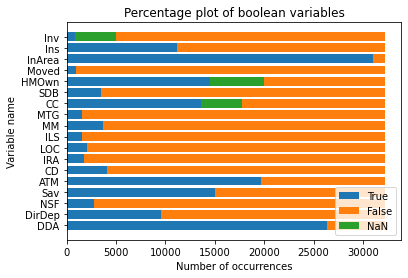

In [4]:
# Part 2: boolean variables

boolean_variable_names = []
true_value_percentages = []
false_value_percentages = []
nan_value_percentages = []
for k in data.columns:
  arr = data[k].unique()
  if arr.dtype == object:
    continue
  arr = np.sort(arr[np.isfinite(arr)]).astype("int64")
  if np.array_equal(arr, [0,1]):
    counts = data[k].value_counts(dropna=False)
    boolean_variable_names.append(k)
    true_value_percentages.append(counts[1])
    false_value_percentages.append(counts[0])
    nan_value_percentages.append(counts.get(np.nan, 0))

tmp = np.array(true_value_percentages) + np.array(nan_value_percentages)
plt.title("Percentage plot of boolean variables")
plt.ylabel("Variable name")
plt.xlabel("Number of occurrences")
plt.barh(boolean_variable_names, true_value_percentages, label='True')
plt.barh(boolean_variable_names, false_value_percentages, left=tmp, label='False')
plt.barh(boolean_variable_names, nan_value_percentages, left=true_value_percentages, label='NaN')
plt.legend()
plt.show()

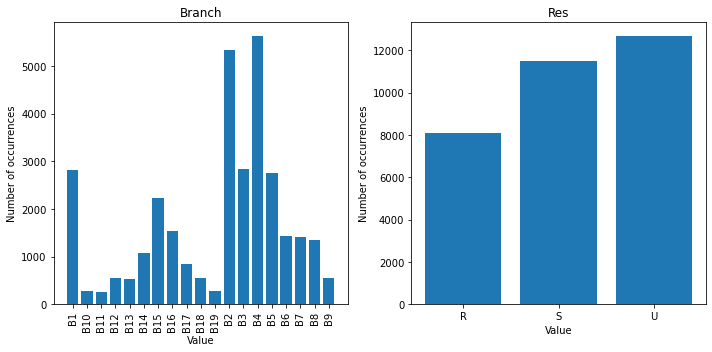

In [5]:
# Part 3: categorical variables

categorical_variable_names = []
for k in data.columns:
  if k in boolean_variable_names:
    continue
  arr = data[k].unique()
  if arr.dtype == object:
    categorical_variable_names.append(k)

fig, axs = plt.subplots(1, len(categorical_variable_names), figsize=(10,5))
for ax, k in zip(axs, categorical_variable_names):
  counts = data[k].value_counts().sort_index()
  X = np.arange(len(counts))
  ax.set_title(k)
  ax.bar(X, counts, align='center')
  ax.set_xticks(X)
  ax.set_xticklabels(counts.index, rotation=90 if len(X) > 10 else 0)
  ax.set_ylabel("Number of occurrences")
  ax.set_xlabel("Value")
fig.tight_layout()

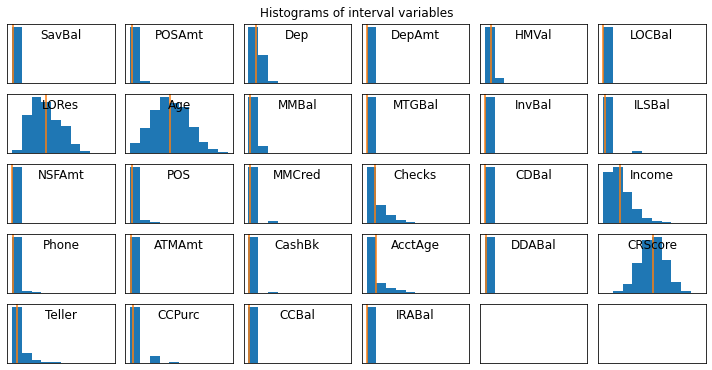

In [6]:
# Part 4: interval variables

interval_variable_names = list(set(data.columns) - set(boolean_variable_names) - set(categorical_variable_names))
fig, axs = plt.subplots(5, 6, figsize=(10,5))

for ax in axs.flatten():
  ax.ticklabel_format(style='plain')
  ax.tick_params(which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False,)

for ax, k in zip(axs.flatten(), interval_variable_names):
  ax.set_title(k, y=1.0, pad=-14)
  arr = data[k]
  arr = arr[np.isfinite(arr)]
  ax.hist(arr)
  ax.plot([arr.mean(), arr.mean()], [0, ax.set_ylim()[1]])
fig.suptitle("Histograms of interval variables", y=1.02)
fig.tight_layout()

In [7]:
# Part 5: missing values
nansum = data.isna().sum()
nansum[nansum != 0]

AcctAge    2070
Phone      4133
POS        4133
POSAmt     4133
CC         4133
CCBal      4133
CCPurc     4133
Income     5782
HMOwn      5533
LORes      5782
HMVal      5782
Age        6357
CRScore     707
Inv        4133
InvBal     4133
dtype: int64

In [8]:
# Part 6: <<1>> values
(data[boolean_variable_names] == 1).sum()

DDA       26316
DirDep     9536
NSF        2809
Sav       15064
ATM       19679
CD         4060
IRA        1719
LOC        2045
ILS        1600
MM         3707
MTG        1592
CC        13590
SDB        3506
HMOwn     14485
Moved       956
InArea    30983
Ins       11175
Inv         835
dtype: int64

## Задание 2
### Постановка задачи
Для «честной» проверки качества моделей и их обобщающей способности разделить данные на два набора: TRAIN – 70% наблюдений и VALIDATE – 30% наблюдений (см. TRAIN_VAL.sas). Все преобразования нужно проводить над двумя наборами, чтобы они были «идентичны» и, в конечном итоге, модель, построенную на первом, можно было бы применить ко второму (проскорить (score) его), а потом сравнить качество. При этом расчет всех параметров производится на тренировочной выборке, а к валидационной применяется преобразование с уже рассчитываемым параметром – он не рассчитывается на валидационной выборке. Например, если мы заменяем пропущенное значение переменной на медиану, то мы считаем медиану только по данным в тренировочной выборке. Полученное значение ставим вместо пропущенных значений и в тренировочной выборке и в валидационной. Подход, когда вы сначала провели все преобразования, а потом разбили выборку на две части – в корне неправильный.

In [9]:
from sklearn.model_selection import train_test_split

y = data["Ins"]
X = data.drop("Ins", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [10]:
X_train

,AcctAge,DDA,DDABal,CashBk,Checks,DirDep,NSF,NSFAmt,Phone,Teller,...,Age,CRScore,Moved,InArea,Branch,Res,Dep,DepAmt,Inv,InvBal
28742,1.6,1,1215.66,0,25,0,0,0.00,NaN,0,...,46.0,674.0,1,1,B15,S,4,3447.25,NaN,NaN
11402,2.3,1,1126.92,0,2,0,0,0.00,0.0,0,...,44.0,713.0,0,1,B3,U,2,846.06,0.0,0.0
30210,2.3,1,7774.54,0,4,0,0,0.00,0.0,4,...,41.0,668.0,0,1,B4,U,2,1548.20,0.0,0.0
2450,0.3,1,0.82,0,0,0,1,9.86,0.0,0,...,66.0,701.0,0,1,B17,R,2,656.87,0.0,0.0
6793,0.6,1,351.48,0,3,0,0,0.00,0.0,0,...,48.0,666.0,0,1,B2,U,2,663.14,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,2.2,1,107.52,1,0,0,1,4.27,0.0,1,...,NaN,639.0,0,1,B2,U,2,504.97,0.0,0.0
5390,9.0,1,6653.98,0,14,0,0,0.00,0.0,6,...,45.0,707.0,0,1,B2,U,3,9939.76,0.0,0.0
860,NaN,1,834.31,0,3,1,0,0.00,NaN,0,...,55.0,639.0,0,1,B15,U,1,828.13,NaN,NaN
15795,10.4,1,4453.38,0,2,0,0,0.00,0.0,4,...,48.0,664.0,0,1,B8,U,2,1173.44,0.0,0.0


## Задание 3
### Постановка задачи
Некоторые переменные имеют пропущенные значения – нужно их заменить. 
1. Например, на медиану/среднее, не забыв создать индикаторы пропущенных значений (см. ex1_missing_imputation.sas). 
2. На практике пропущенные значения заменяют наиболее вероятным, т.е. строят модель, предсказывающую, что должно стоять на месте пропущенного значения, используя остальные переменные. Попробуйте проделать это для одной из переменных с пропущенными значениями. Не требуйте многого от этой модели – она может быть простая, особо не гонитесь за точностью.
3. Разбить наблюдения на группы («кластеризовать»), при наличии пропущенного значения поставить среднее по группе, куда попало наблюдение (см. ex2_missing_imputation.sas).


In [9]:
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

class Imputer(TransformerMixin, BaseEstimator):
  def __init__(self, strategy="median"):
    self.strategy = strategy

  def impute(self, X, colindex):
    if self.strategy == "nothing":
      return np.nan
    elif self.strategy == "model":
      return self.cols[colindex].predict(np.delete(X, colindex, axis=1))
    elif self.strategy == "kmeans":
      return self.centers[self.kmeans.predict(X),colindex]
    else:
      return self.cols[colindex]

  def collect(self, X, colindex):
    col = X[:,colindex]
    if np.isnan(col).any() == False:
      self.useless_col.append(colindex + X.shape[1])
      return np.nan
    
    # Part 1: median
    if self.strategy == "median":
      return np.nanmedian(col)
    elif self.strategy == "mean":
      return np.nanmean(col)
    elif self.strategy == "model":
      # Part 2: model
      X = X[~np.isnan(col),:]
      X1 = np.delete(X, colindex, axis=1)
      y = X[:,colindex]
      return make_pipeline(SimpleImputer(), StandardScaler(), LinearRegression()).fit(X1, y)

  def fit(self, X, y=None):
    X = np.array(X, dtype="float64")
    self.useless_col = []
    if self.strategy == "kmeans":
      # Part 3: clusterization
      km = KMeans(n_clusters=3)
      self.kmeans = make_pipeline(SimpleImputer(), km).fit(X)
      self.centers = km.cluster_centers_
      
    self.cols = [self.collect(X, i) for i in range(X.shape[1])]
    return self

  def transform(self, X):
    X = np.array(X, dtype="float64")
    na1 = np.isnan(X)
    res = np.hstack([X, na1])
    na2 = na1.any(axis=1)
    X2 = X[na2,:]
    for i in range(X.shape[1]):
      if np.isnan(res[na2,i]).any() == False:
        continue
      res[na2,i] = self.impute(X2, i)
    return np.delete(res, self.useless_col, axis=1)

In [10]:
# Part 4: test everything

print("model\n", Imputer(strategy="model").fit_transform(X_train[["CC", "Inv", "Dep"]])[:2])
print("median\n", Imputer(strategy="median").fit_transform(X_train[["CC", "Inv", "Dep"]])[:2])
print("mean\n", Imputer(strategy="mean").fit_transform(X_train[["CC", "Inv", "Dep"]])[:2])
print("kmeans\n", Imputer(strategy="kmeans").fit_transform(X_train[["CC", "Inv", "Dep"]])[:2])

model
 [[0.47629373 0.01785915 4.         1.         1.        ]
 [0.         0.         2.         0.         0.        ]]
median
 [[0. 0. 4. 1. 1.]
 [0. 0. 2. 0. 0.]]
mean
 [[0.48397078 0.02952217 4.         1.         1.        ]
 [0.         0.         2.         0.         0.        ]]
kmeans
 [[0.49978403 0.02261955 4.         1.         1.        ]
 [0.         0.         2.         0.         0.        ]]


## Задание 4
### Постановка задачи
Рассмотреть методы кодирования категориальных переменных в PROC LOGISTIC (см. тут). Использовать их для нескольких любых переменных, кроме Branch.

In [11]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
  ('cat', OneHotEncoder(), categorical_variable_names),
], remainder="passthrough")

OneHotEncoder().fit_transform(X_train[["Res", "CC"]]).todense()

matrix([[0., 1., 0., 0., 0., 1.],
        [0., 0., 1., 1., 0., 0.],
        [0., 0., 1., 0., 1., 0.],
        ...,
        [0., 0., 1., 0., 0., 1.],
        [0., 0., 1., 1., 0., 0.],
        [1., 0., 0., 1., 0., 0.]])

## Задание 5
### Постановка задачи
Рассмотреть пример (см. ex3_cat_inputs.sas) кодирования переменной Branch методом, описанным на лекции. Применить его.

In [12]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Part 1: find the clusters
clust_X = [] 
clust_labels = []
for i, k in enumerate(X_train['Branch'].unique()):
  mean = y_train[X_train['Branch'] == k].mean()
  tmp = X_train[X_train['Branch'] == k][interval_variable_names].fillna(0).mean(axis=0)
  clust_X.append(np.hstack((tmp, [mean])))
  # clust_X.append([mean])
  clust_labels.append(k)

aggcluster = AgglomerativeClustering(distance_threshold=10, n_clusters=None)
make_pipeline(StandardScaler(), aggcluster).fit(clust_X)
pass

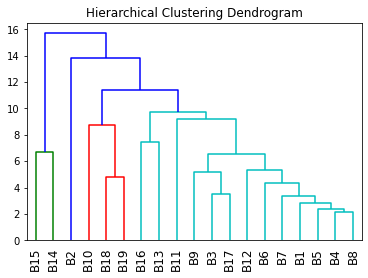

In [13]:
# Part 2: plot dendrogram 
def plot_dendrogram(model, **kwargs):
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count

  linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
  dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(aggcluster, labels=clust_labels, leaf_rotation=90)
plt.show()

In [14]:
# Part 3: save clusters as new column
d = {e: aggcluster.labels_[i] for i,e in enumerate(clust_labels)}
to_custer = np.vectorize(d.get)
X_train['BranchCluster'] = to_custer(X_train['Branch'])
X_test['BranchCluster'] = to_custer(X_test['Branch'])

## Задание 6
### Постановка задачи
Variable screening & logit plots. 
1. Провести первичный одномерный отбор переменных (screening) (см. ex4_screen_spearman_hoef.sas). (Не будьте очень суровы: одномерный есть одномерный – переменная может быть незначимой, но в пересечении с какой-то другой окажется очень полезной.)
2. Обратить внимание на линейность зависимости между переменными и целевой переменной, используя logit-графики для оригинальных переменных (см. ex5_logit_plots.sas) и 
3. для сгруппированных (binned) (см. ex5_logit_plots.sas). Ожидается, что группировка поможет нам побороть нелинейность (заодно повысит устойчивость модели). Если нужно, провести подходящие преобразования переменных.


In [15]:
# Part 1: using spearman for screening

from sklearn.feature_selection import SelectKBest
from scipy.stats import spearmanr

def spearmanr_wrap(*args):
  correlation, pvalue = spearmanr(*args)
  return (np.abs(correlation[-1,:-1]), pvalue[-1,:-1])

X_train_tmp = X_train.drop(columns=['Branch', 'Res'])
select_best = SelectKBest(score_func=spearmanr_wrap, k=42)
make_pipeline(SimpleImputer(), select_best).fit_transform(X_train_tmp, y_train)
dropped_columns = list(X_train_tmp.columns[~select_best.get_support()])
print("dropped columns: ", dropped_columns)

screening_transformer = ColumnTransformer([
  ('drop', 'drop', dropped_columns),
  ('cat', OneHotEncoder(), categorical_variable_names),
], remainder='passthrough')

dropped columns:  ['MTGBal', 'HMOwn', 'LORes', 'CRScore']


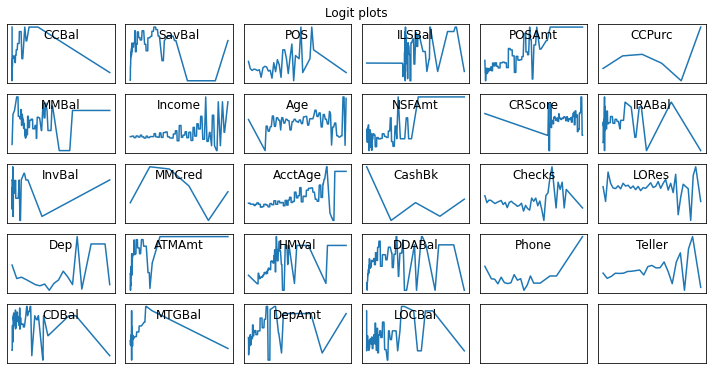

In [16]:
# Part 2: logit plots
from sklearn.preprocessing import KBinsDiscretizer
import warnings
warnings.simplefilter("ignore", RuntimeWarning)
warnings.simplefilter("ignore", UserWarning)
# warnings.simplefilter("always")

X_train_binnable = X_train[interval_variable_names].fillna(0)

binner = KBinsDiscretizer(n_bins=50, encode='ordinal', strategy='kmeans')
transforemed = binner.fit_transform(X_train_binnable)

def logit_plot_prep(col, realcol):
  X = np.arange(binner.n_bins) #np.sort(np.unique(col))
  freq = X.copy()
  ins = X.copy()
  for i in range(len(X)):
    freq[i] = (col == X[i]).sum()
    ins[i] = y_train[col == X[i]].sum()
  elogit = np.log((ins + (np.sqrt(freq)/2))/(freq - ins + (np.sqrt(freq)/2)))
  idx = np.argsort(realcol)
  X2 = np.array(realcol)[idx]
  elogit2 = elogit[col.astype(int)][idx]
  nanidx = ~np.isnan(elogit) 
  X = X[nanidx]
  elogit = elogit[nanidx]
  return (X, elogit), (X2, elogit2)

fig, axs = plt.subplots(5, 6, figsize=(10,5))
for ax in axs.flatten():
  ax.ticklabel_format(style='plain')
  ax.tick_params(which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False,)

plot_data = []
for icol, (ax, colname) in enumerate(zip(axs.flatten(), interval_variable_names)):
  tmp = logit_plot_prep(transforemed[:,icol], X_train_binnable[colname])
  plot_data.append(tmp)
  ax.set_title(colname, y=1.0, pad=-14)
  ax.plot(*tmp[1])
fig.suptitle("Logit plots", y=1.02)
fig.tight_layout()

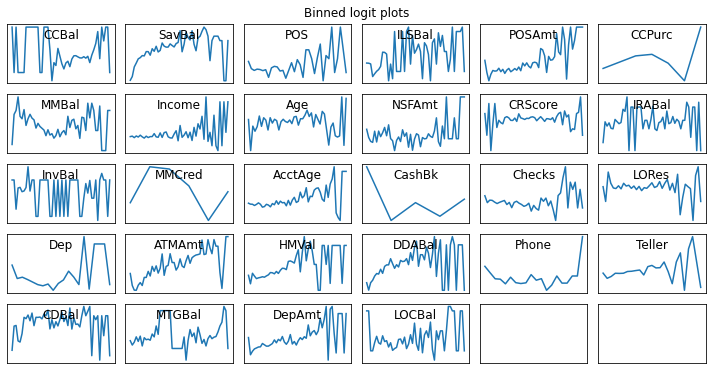

In [17]:
# Part 3: binned logit plots

binner_transformer = ColumnTransformer([
  ('cat', OneHotEncoder(), categorical_variable_names),
  ('bin', make_pipeline(Imputer(strategy="mean"), binner), interval_variable_names),
], remainder='passthrough')


fig, axs = plt.subplots(5, 6, figsize=(10,5))
for ax in axs.flatten():
  ax.ticklabel_format(style='plain')
  ax.tick_params(which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False,)

for icol, (ax, colname) in enumerate(zip(axs.flatten(), interval_variable_names)):
  tmp = plot_data[icol]
  ax.set_title(colname, y=1.0, pad=-14)
  ax.plot(*tmp[0])
fig.suptitle("Binned logit plots", y=1.02)
fig.tight_layout()

## Задание 7
### Постановка задачи
Выбрать 3 модели-кандидата среди тех, которые вы построили в рамках выполнения предыдущих пунктов этого ДЗ. Для отбора используйте три разных метода оценки качества и набор TRAIN. Приведите агрегированные результаты исследования качества.

In [18]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

basic_transformer = ColumnTransformer([
  ('cats', 'drop', categorical_variable_names),
  ('bools', 'drop', list(set(boolean_variable_names) - set(['Ins']))),
  ('nans', 'drop', X_train.columns[X_train.isna().any(axis=0)]),
], remainder="passthrough")

models = [
  ("basic", make_pipeline(basic_transformer, StandardScaler(), LogisticRegression())),
  ("mean", make_pipeline(column_transformer, Imputer(strategy="mean"), StandardScaler(), LogisticRegression())),
  ("median", make_pipeline(column_transformer, Imputer(strategy="median"), StandardScaler(), LogisticRegression())),
  ("model", make_pipeline(column_transformer, Imputer(strategy="model"), StandardScaler(), LogisticRegression())),
  ("kmeans", make_pipeline(column_transformer, Imputer(strategy="kmeans"), StandardScaler(), LogisticRegression())),
  ("mean screening", make_pipeline(screening_transformer, Imputer(strategy="mean"), StandardScaler(), LogisticRegression())),
  ("median screening", make_pipeline(screening_transformer, Imputer(strategy="median"), StandardScaler(), LogisticRegression())),
  ("model screening", make_pipeline(screening_transformer, Imputer(strategy="model"), StandardScaler(), LogisticRegression())),
  ("kmeans screening", make_pipeline(screening_transformer, Imputer(strategy="kmeans"), StandardScaler(), LogisticRegression())),
  ("mean binner", make_pipeline(binner_transformer, Imputer(strategy="mean"), StandardScaler(), LogisticRegression())),
  ("median binner", make_pipeline(binner_transformer, Imputer(strategy="median"), StandardScaler(), LogisticRegression())),
  ("model binner", make_pipeline(binner_transformer, Imputer(strategy="model"), StandardScaler(), LogisticRegression())),
  ("kmeans binner", make_pipeline(binner_transformer, Imputer(strategy="kmeans"), StandardScaler(), LogisticRegression())),
]

table = pd.DataFrame({'name': [], 'roc_auc_score': [], 'f1_score': [], 'accuracy_score' : []})
for name, model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_train)
  table = table.append({
    'name': name,
    'roc_auc_score': roc_auc_score(y_train, y_pred),
    'f1_score': f1_score(y_train, y_pred),
    'accuracy_score' : accuracy_score(y_train, y_pred),
  }, ignore_index=True)

In [19]:
table

,name,roc_auc_score,f1_score,accuracy_score
0,basic,0.613854,0.415401,0.713603
1,mean,0.653751,0.509576,0.731270
2,median,0.652667,0.507836,0.730252
3,model,0.649916,0.502755,0.728303
4,kmeans,0.653717,0.509535,0.731226
5,mean screening,0.652799,0.508039,0.730384
6,median screening,0.652664,0.507875,0.730207
7,model screening,0.649619,0.502309,0.727993
8,kmeans screening,0.652864,0.508160,0.730429
9,mean binner,0.667847,0.537407,0.738532


In [20]:
best_models = np.array(models)[[9,10,12]]

## Задание 8
### Постановка задачи
Сравнить модели используя KS (PROC NPAR1WAY) и ROC (PROC LOGISTIC) на наборах TRAIN и VALIDATE. Выбрать лучшую. Выбрать наиболее «устойчивую» (значения статистик качества на TRAIN и VALIDATE примерно равны) (см. ex6_KS.sas и ex7_ROC_comp.sas).

In [21]:
from scipy.stats import ks_2samp

table2 = pd.DataFrame({'name': [], 'roc train': [], 'roc test': [], 'ks train': [], 'ks test': [],})
for name, model in best_models:
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  table2 = table2.append({
    'name': name,
    'roc train': roc_auc_score(y_train, y_pred_train),
    'roc test': roc_auc_score(y_test, y_pred_test),
    'ks train' : ks_2samp(y_train, y_pred_train)[0],
    'ks test' : ks_2samp(y_test, y_pred_test)[0],
  }, ignore_index=True)

In [22]:
table2['roc delta'] = table2['roc test'] - table2['roc train'] 
table2['ks delta'] = table2['ks test'] - table2['ks train'] 
table2

,name,roc train,roc test,ks train,ks test,roc delta,ks delta
0,mean binner,0.667338,0.671629,0.120705,0.124793,0.004291,0.004088
1,median binner,0.667695,0.671323,0.120528,0.124690,0.003628,0.004162
2,kmeans binner,0.668167,0.671810,0.119598,0.123864,0.003643,0.004266
